## Notebook Purpose & Summary


This notebook aims to generate analytics from the data generated from video analysis. Businesses can use these analytics to gain insights into customer behavior and make informed business decisions. The video analysis was conducted using state-of-the-art (SOTA) algorithms in Computer Vision. 

The possibilities for analytics are endless, but the purpose of this notebook is to provide a few examples of what is possible below.

(1) Where Do Customers Go?

(2) How Many Customers Do We Have? 

(3) What Else Is Possible?


## Where Do Customers Go?


We will first focus on figuring out where our customers go. We use a heatmap to show this, with color variations corresponding to an area's activity. This map gives us a visual representation of which areas of the store or space are most popular and which may need more attention.


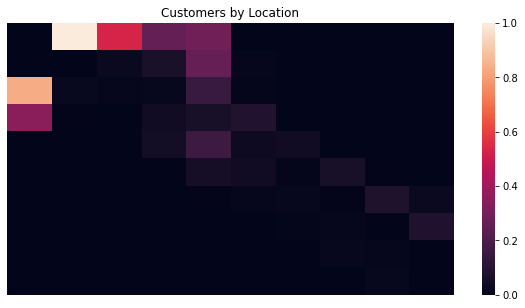

In [4]:
# Import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Set constants
FILENAME = 'results.txt'
BINS = 10

# Create a dataframe from the tracking data
df = pd.read_csv(FILENAME, \
                 names=['frame', 'person', 'x1', 'y1', 'width', 'height', 'conf', 'x', 'y', 'z']).\
                 drop(['x', 'y', 'z'], axis=1)

# Calculate the centers for x & y for each bounding box
df['x_ctr'] = (df['x1'] + 0.5*df['width'])
df['y_ctr'] = (df['y1'] + 0.5*df['height'])
df.sort_values(by=['frame', 'person'], inplace=True)

# Create an x and y dataset from the calculated centers for x & y in the dataframe
x = df[['x_ctr']].values.astype(int)[:,0]
y = df[['y_ctr']].values.astype(int)[:,0]
            
# Create the heatmap variables
# Use a histogram to bin the location data
heatmap, xedges, yedges = np.histogram2d(x, y, bins=BINS)
heatmap = heatmap/heatmap.max()

# Build and show the heatmap
fig, ax = plt.subplots(figsize=(10, 5)) 
ax = sns.heatmap(heatmap, \
                 xticklabels=False, yticklabels=False)
ax.invert_xaxis()
ax.set_title('Customers by Location')
plt.show()

## How Many Customers Do We Have?


A second area we will examine is the number of customers we have over a particular timeframe. This analysis will show how crowded or empty we are, which can help optimize staffing and inventory levels. 

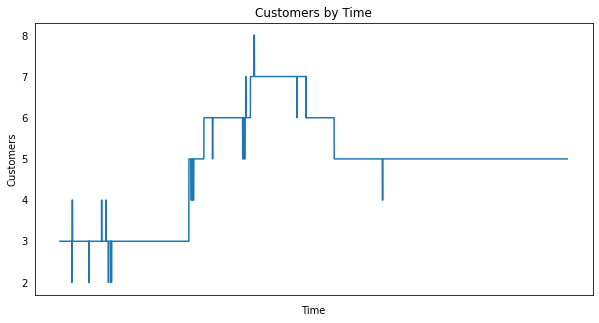

In [5]:
# Create a variable with customer counts by frame
customers = df.groupby('frame')['frame'].count().values

# Build and show the lineplot
fig, ax = plt.subplots(figsize=(10, 5)) 
ax = sns.lineplot(data=customers)
ax.set_title('Customers by Time')
ax.set(xlabel='Time')
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
ax.set(ylabel='Customers')
ax.tick_params(left=False)
plt.show()

## What Else Is Possible?

Lastly, we explore what else is possible. 

* How many unique customers did we see?
* Did anyone fall down?
* How far do people move?
* How long do people stay? 
* How fast do people move? 

Please see the details below.

In [12]:
# Create a list of the unique ids
persons = df.person.unique()

# How many unique people were identified?
print('\n' + str(len(df.person.unique())) + ' people where identified and tracked\n')

# Person down alerts - was anyone vertical?
frames_down = df.query('width > height').count()[0]
print('%d ALERTs that a persons fell\n\n' % frames_down)

# Create variables to store data that the df needs
first_frames = []
last_frames = []
total_frames = []
total_distance = []

for p in persons:
  # Find the first and last frame for a person p
  first_frame = df[df.person==p].frame.min()
  last_frame = df[df.person==p].frame.max()

  # Calculate the distance moved by a person in pixels
  x1_s = df[df.person == p]['x1'].values
  y1_s = df[df.person == p]['y1'].values
  x_moves = np.diff(x1_s, prepend=x1_s[0])
  y_moves = np.diff(y1_s, prepend=y1_s[0])
  distances = (x_moves**2 + y_moves**2)**0.5

  # Append our lists
  first_frames.append(first_frame)
  last_frames.append(last_frame)
  total_frames.append(last_frame - first_frame)
  total_distance.append(round(sum(distances), 1))

data = {'person': persons, \
        'first_frame': first_frames, \
        'last_frame': last_frames, \
        'total_frames': total_frames, \
        'total_distance': total_distance
        }

people = pd.DataFrame(data)
people['average_speed'] = people['total_distance'] / people['total_frames']
people['average_speed'] = people['average_speed'].round(2)
people


13 people where identified and tracked

0 ALERTs that a persons fell




,person,first_frame,last_frame,total_frames,total_distance,average_speed
0,1,0,225,225,295.6,1.31
1,2,0,9074,9074,5473.0,0.60
2,3,0,9074,9074,3950.2,0.44
3,4,219,9074,8855,5826.5,0.66
4,5,745,749,4,3.0,0.75
5,6,822,824,2,13.6,6.80
6,7,2306,9074,6768,4113.5,0.61
7,8,2307,4413,2106,1875.3,0.89
8,9,2575,4397,1822,1563.1,0.86
9,11,3323,3325,2,3.4,1.70
